In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)
import numpy as np
import sys
sys.path.insert(0, '/home/was966/Research/mims-conceptor/')
from conceptor.tokenizer import CONCEPT_palette

CONCEPT_palette.pop('CANCER')

hue_order = CONCEPT_palette.keys()
hue_color = CONCEPT_palette.values()

In [2]:
dfs_tcga = pd.read_csv('../../02_extract_readouts/TCGA/02_readouts_celltype.csv', index_col = 0)
dfl_tcga = pd.read_csv('../../02_extract_readouts//TCGA/00_clinical_label_orignal.csv', index_col=0)
dfl_tcga['domain'] = 'TCGA'

tcga = dfl_tcga[['cancer_type', 'domain']].join(dfs_tcga)
tcga['cancer_type'] = tcga['cancer_type'].apply(lambda x:x.split('-')[1])

dfs_itrp = pd.read_csv('../../02_extract_readouts/ITRP/02_readouts_celltype.csv', index_col = 0)
dfl_itrp = pd.read_csv('../../02_extract_readouts//ITRP/00_clinical_label.csv', index_col=0)
dfl_itrp['domain'] = 'ITRP'

itrp = dfl_itrp[['cancer_type', 'domain']].join(dfs_itrp)

In [3]:
dfs = tcga._append(itrp)

In [54]:
tcga_var = dfs[dfs.domain == 'TCGA'].groupby('cancer_type')[list(hue_order)].var()
tcga_mean = dfs[dfs.domain == 'TCGA'].groupby('cancer_type')[list(hue_order)].mean()

size = dfs[dfs.domain == 'TCGA'].groupby('cancer_type').size()
size = size.index + "(n=" + size.astype(str) + ")"
tcga_log2var = np.log10(tcga_var)

x_order = tcga_log2var.median().sort_values(ascending=False).index
y_order = tcga_log2var.T.median().sort_values(ascending=False).index

tcga_log2var = tcga_log2var[x_order].loc[y_order]
tcga_log2var.index = tcga_log2var.index.map(size)

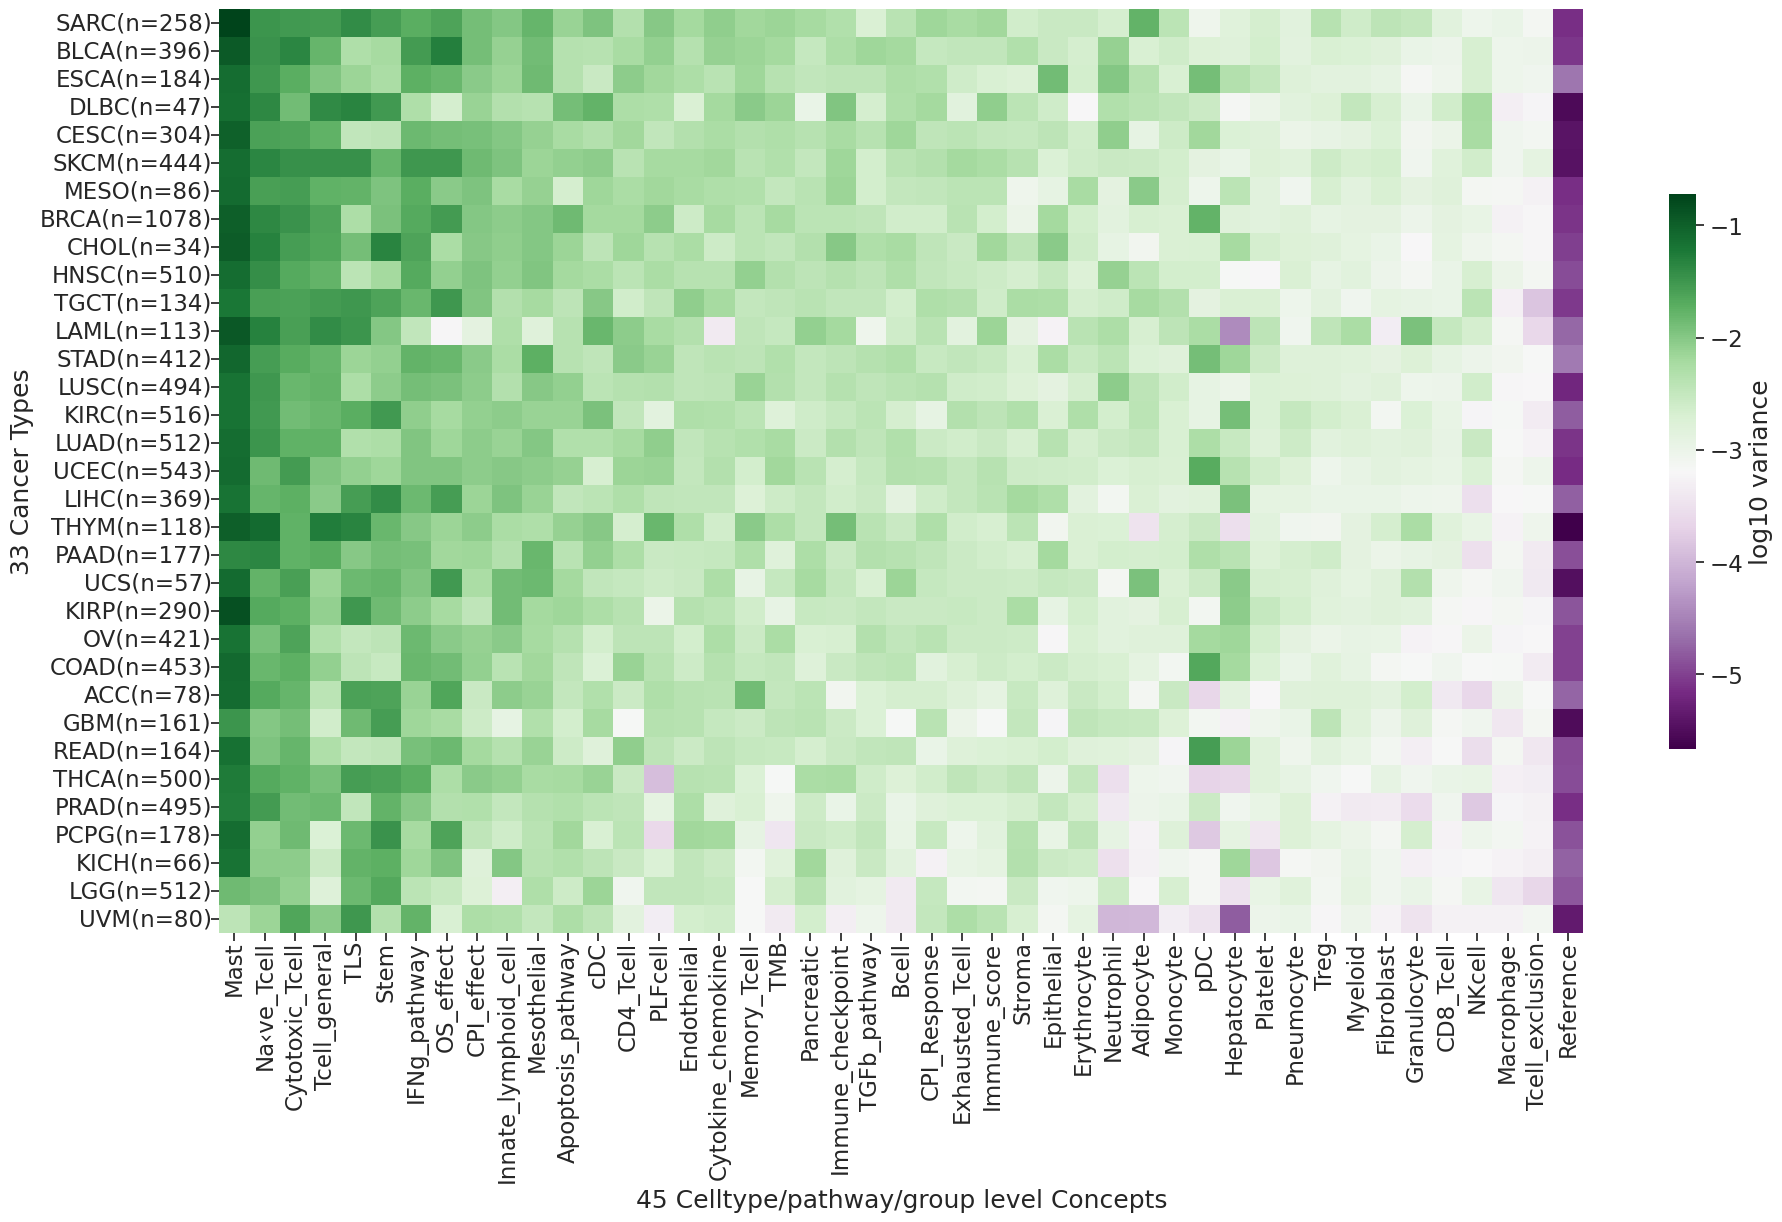

In [5]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(tcga_log2var, ax=ax, cmap='PRGn', cbar_kws={'shrink': 0.6, 'label': 'log10 variance'})
ax.set_ylabel('33 Cancer Types')
ax.set_xlabel('45 Celltype/pathway/group level Concepts')
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)

fig.savefig('Score_TCGA_Cell_concept_var.pdf', bbox_inches ='tight')

/tmp/ipykernel_11128/1400592689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x = 'Concept', y = 'log10_var', fliersize = 0, order = x_order,  palette=hue_color, boxprops={'alpha':0.8})
/tmp/ipykernel_11128/1400592689.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data, x = 'Concept', y = 'log10_var', order = x_order,  palette = hue_color, size = 5, edgecolor='k') #, hue = 'cancer_type'
/tmp/ipykernel_11128/1400592689.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_order,


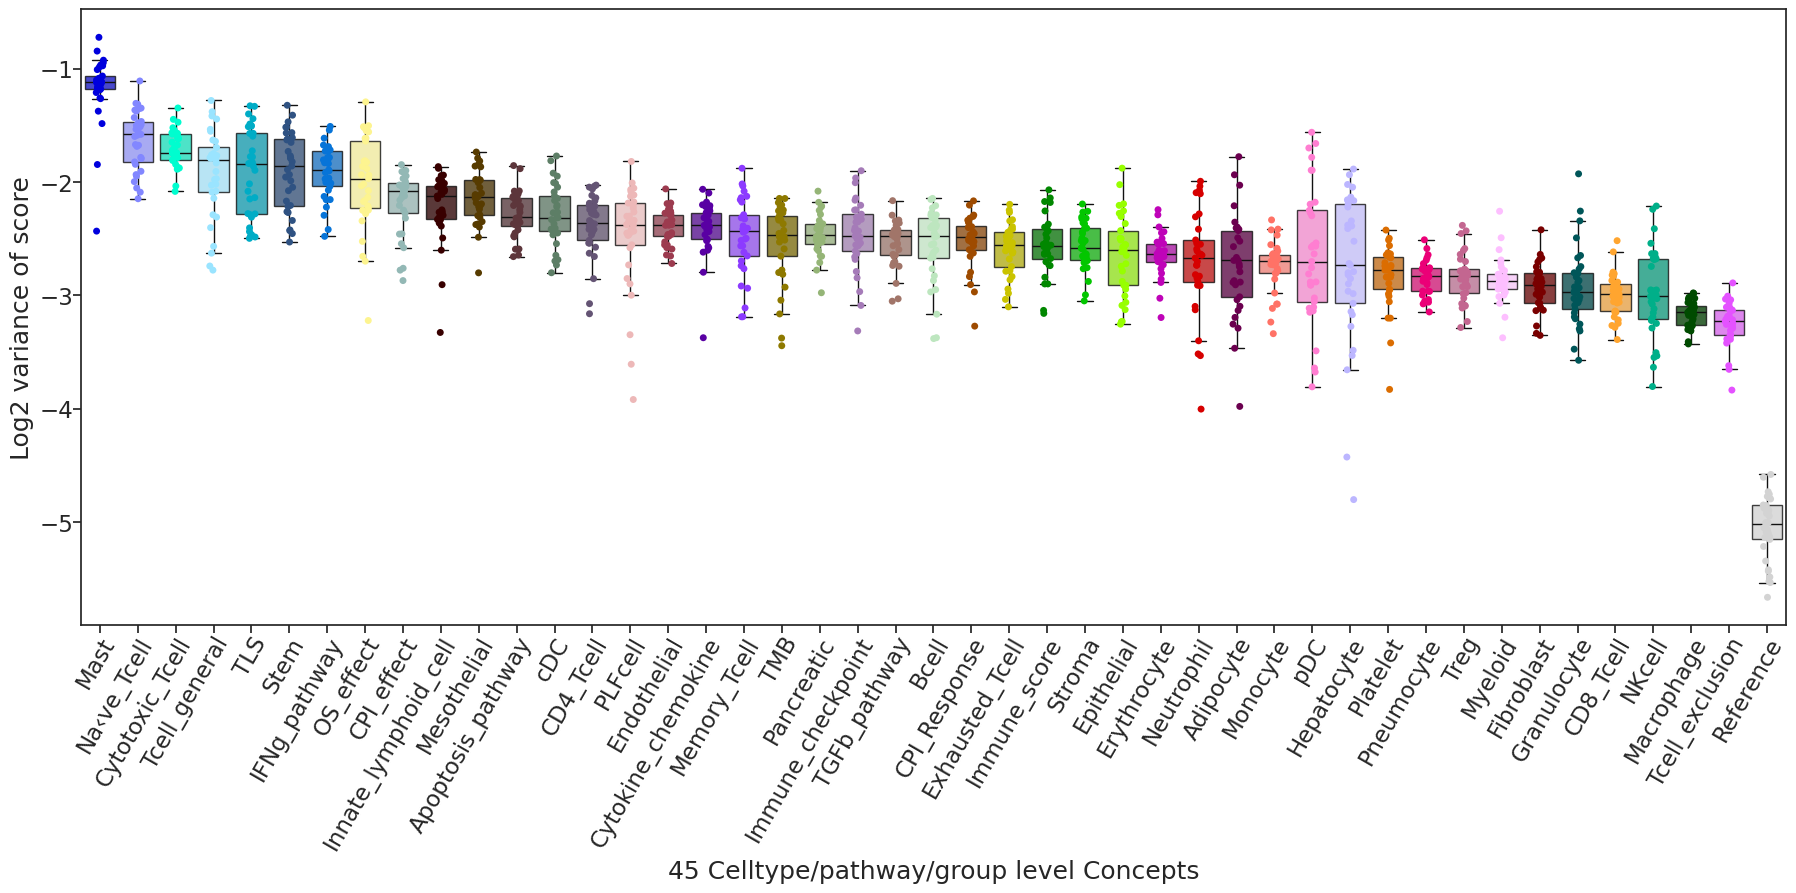

In [6]:
data = tcga_log2var.unstack().reset_index()
data.columns = ['Concept', 'cancer_type', 'log10_var']

fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(data, x = 'Concept', y = 'log10_var', fliersize = 0, order = x_order,  palette=hue_color, boxprops={'alpha':0.8})
sns.stripplot(data, x = 'Concept', y = 'log10_var', order = x_order,  palette = hue_color, size = 5, edgecolor='k') #, hue = 'cancer_type'

ax.set_ylabel('Log2 variance of score')
ax.set_xlabel('45 Celltype/pathway/group level Concepts')
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax.set_xticklabels(x_order, 
                    rotation=60, 
                    ha="right",  
                    rotation_mode="anchor")  # <====== HERE is the ke

fig.savefig('Score_TCGA_Cell_concept_var_boxplot.pdf' ,bbox_inches ='tight')

In [56]:
x_order[:3]

Index(['Mast', 'Na‹ve_Tcell', 'Cytotoxic_Tcell'], dtype='object')

In [57]:
x_order[-3:]

Index(['Macrophage', 'Tcell_exclusion', 'Reference'], dtype='object')

In [79]:
cancer_colors = sns.color_palette(cc.glasbey, n_colors= len(size))
cancer_color_map = dict(zip(size.tolist(), cancer_colors))

/tmp/ipykernel_11128/3973663913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cancer_type'] = data['cancer_type'].map(size)
/tmp/ipykernel_11128/3973663913.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x = x, y = y, fliersize = 0, order = cancer_order,  palette= cancer_color, boxprops={'alpha':0.6})
/tmp/ipykernel_11128/3973663913.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data, x = x, y = y, order = cancer_order,

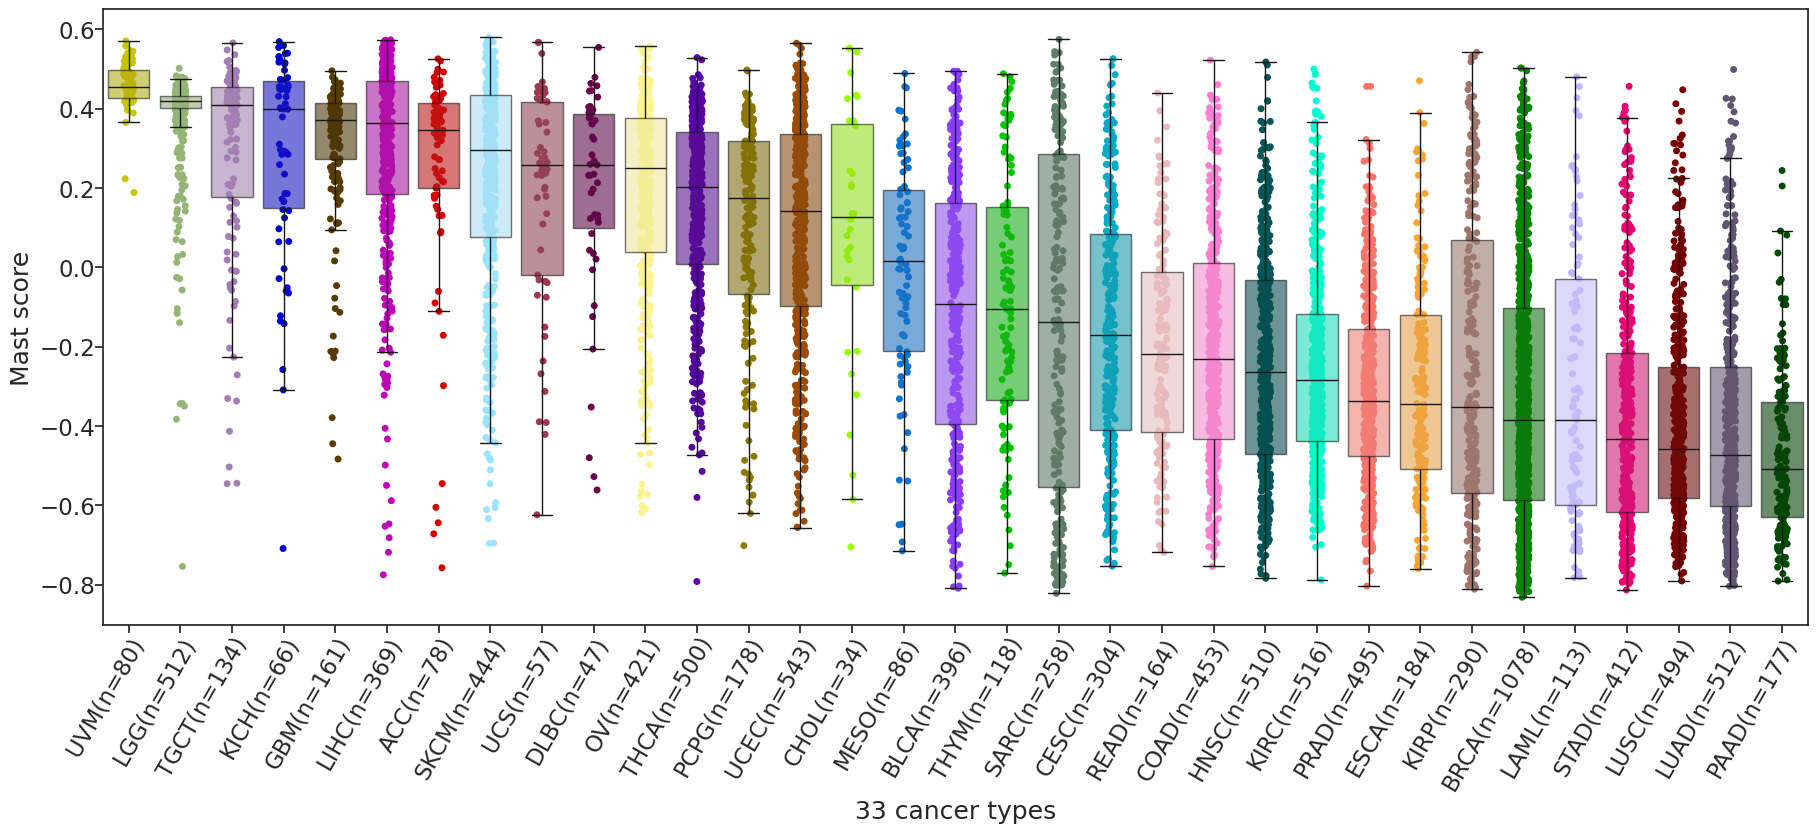

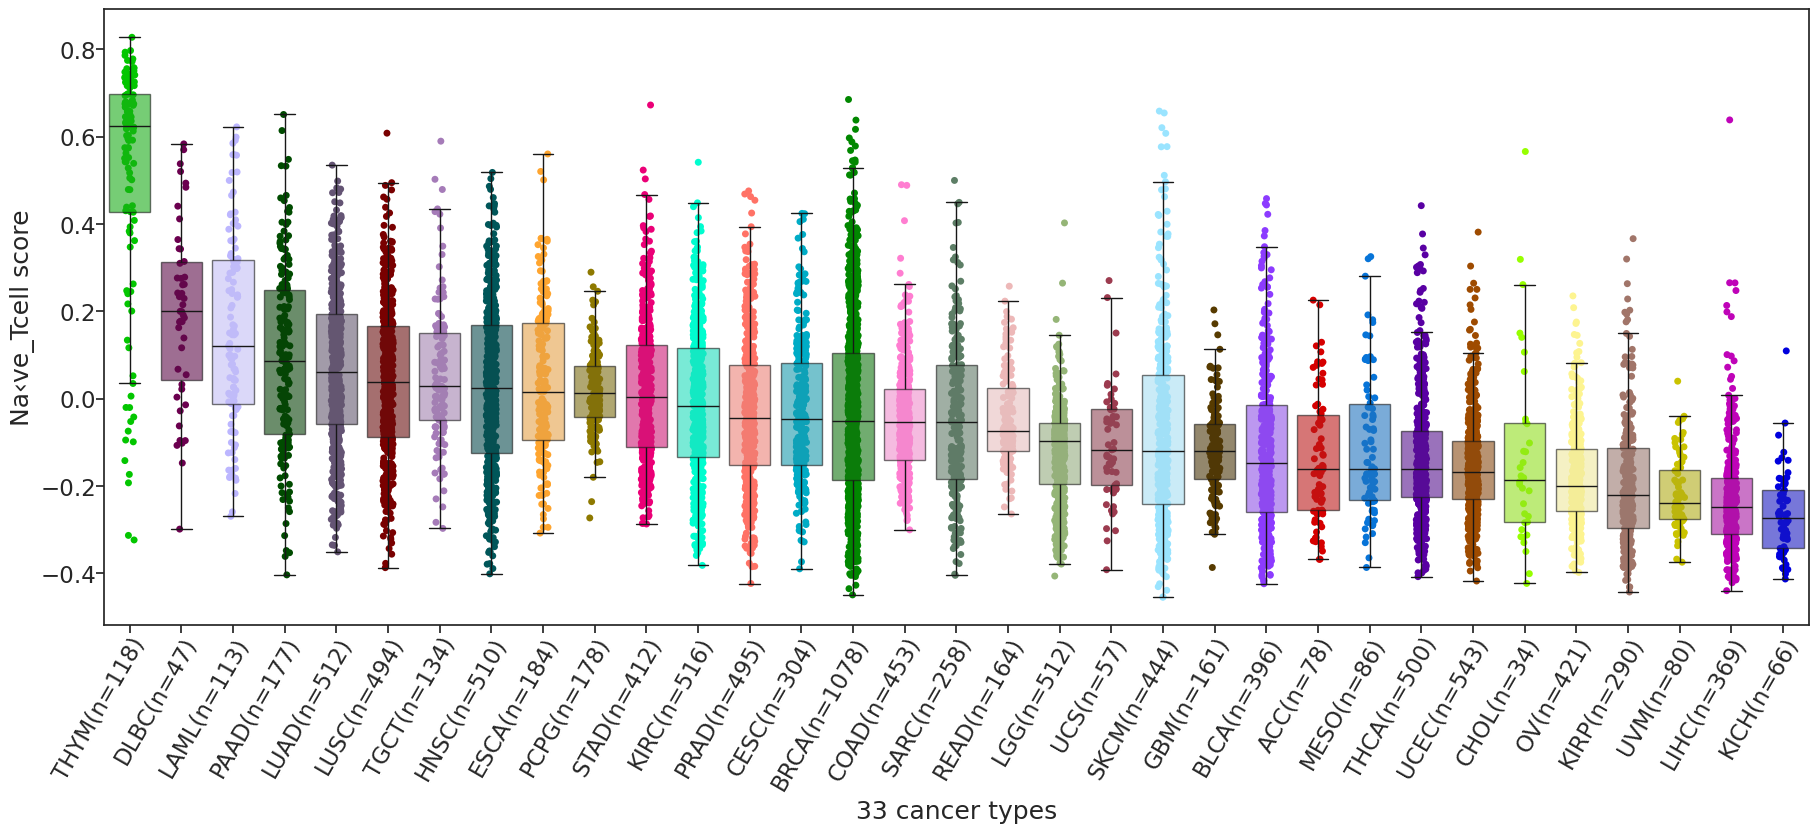

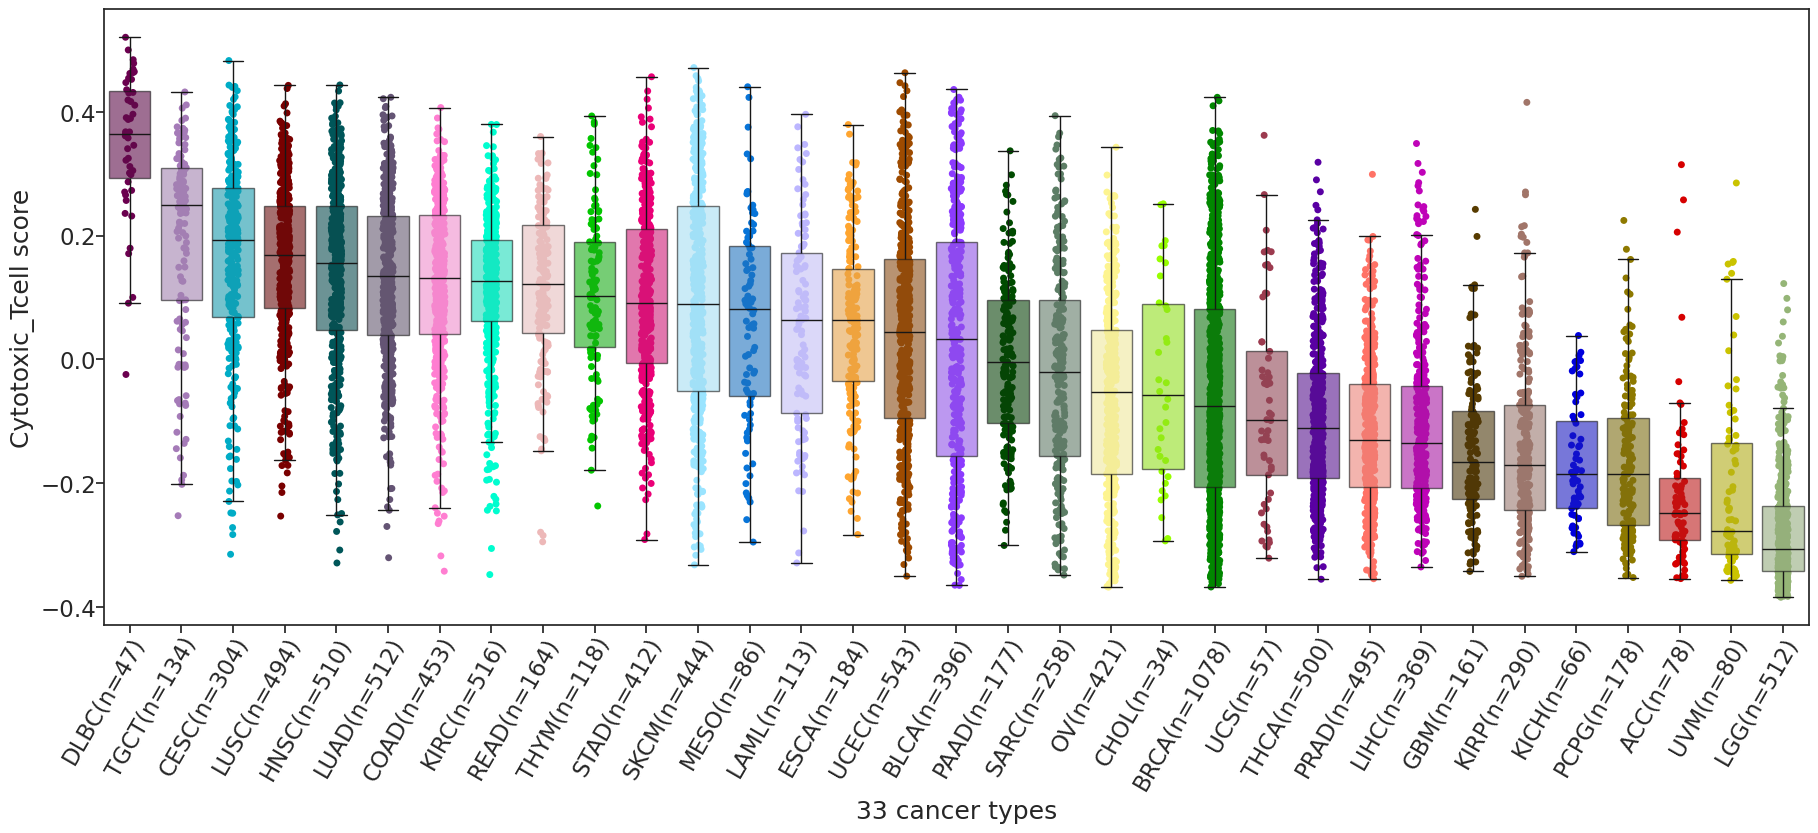

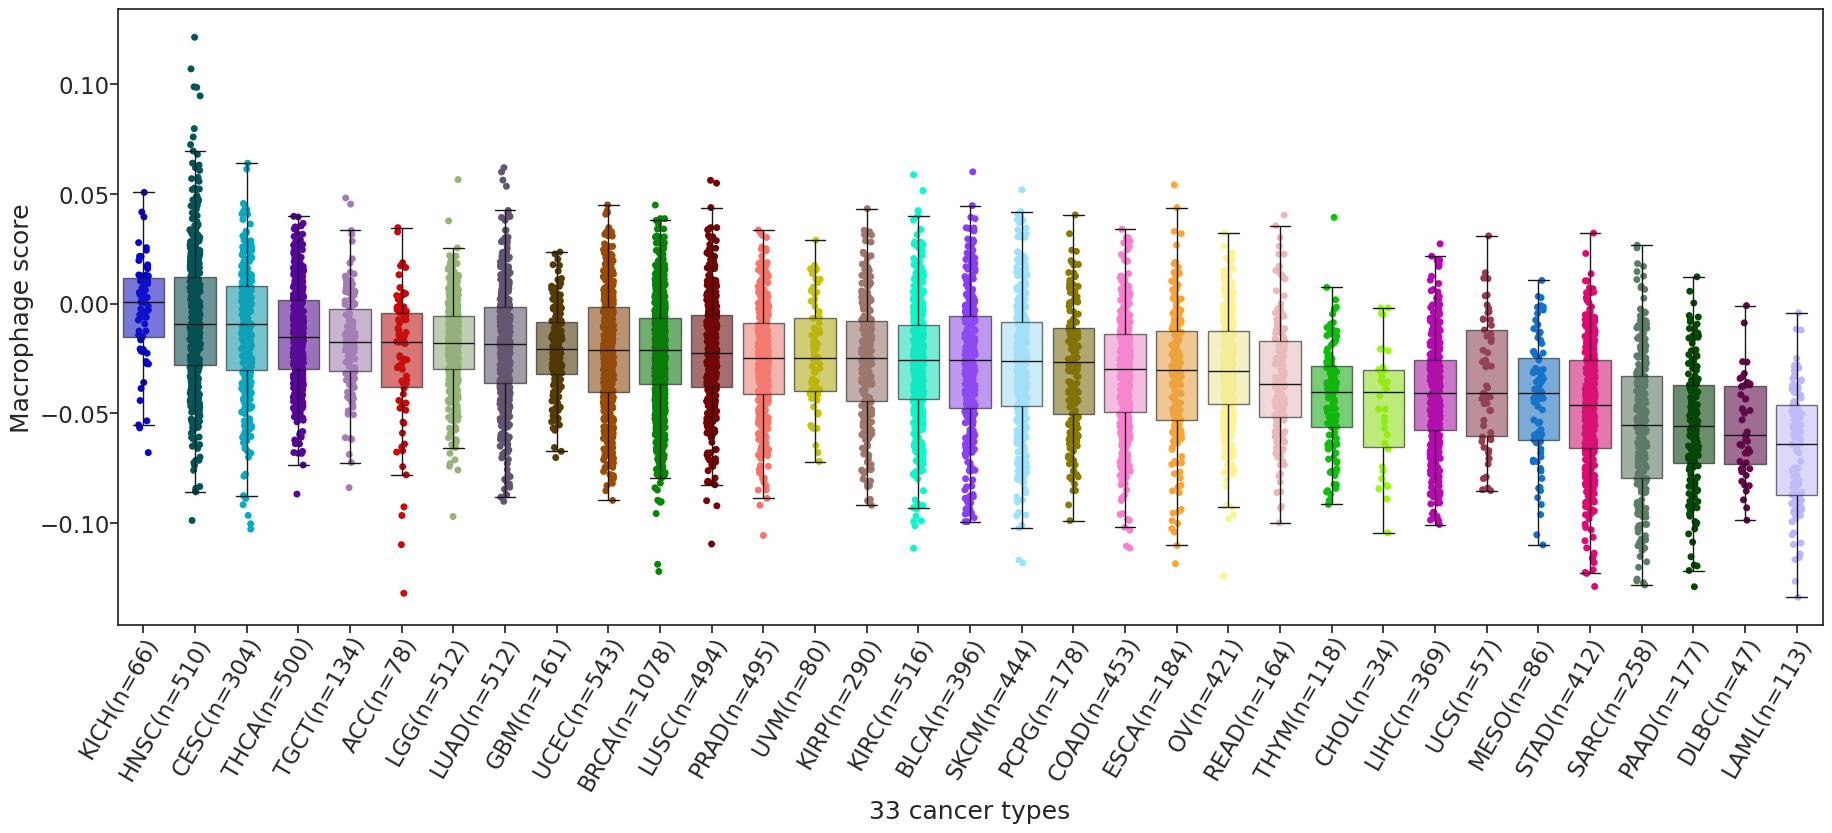

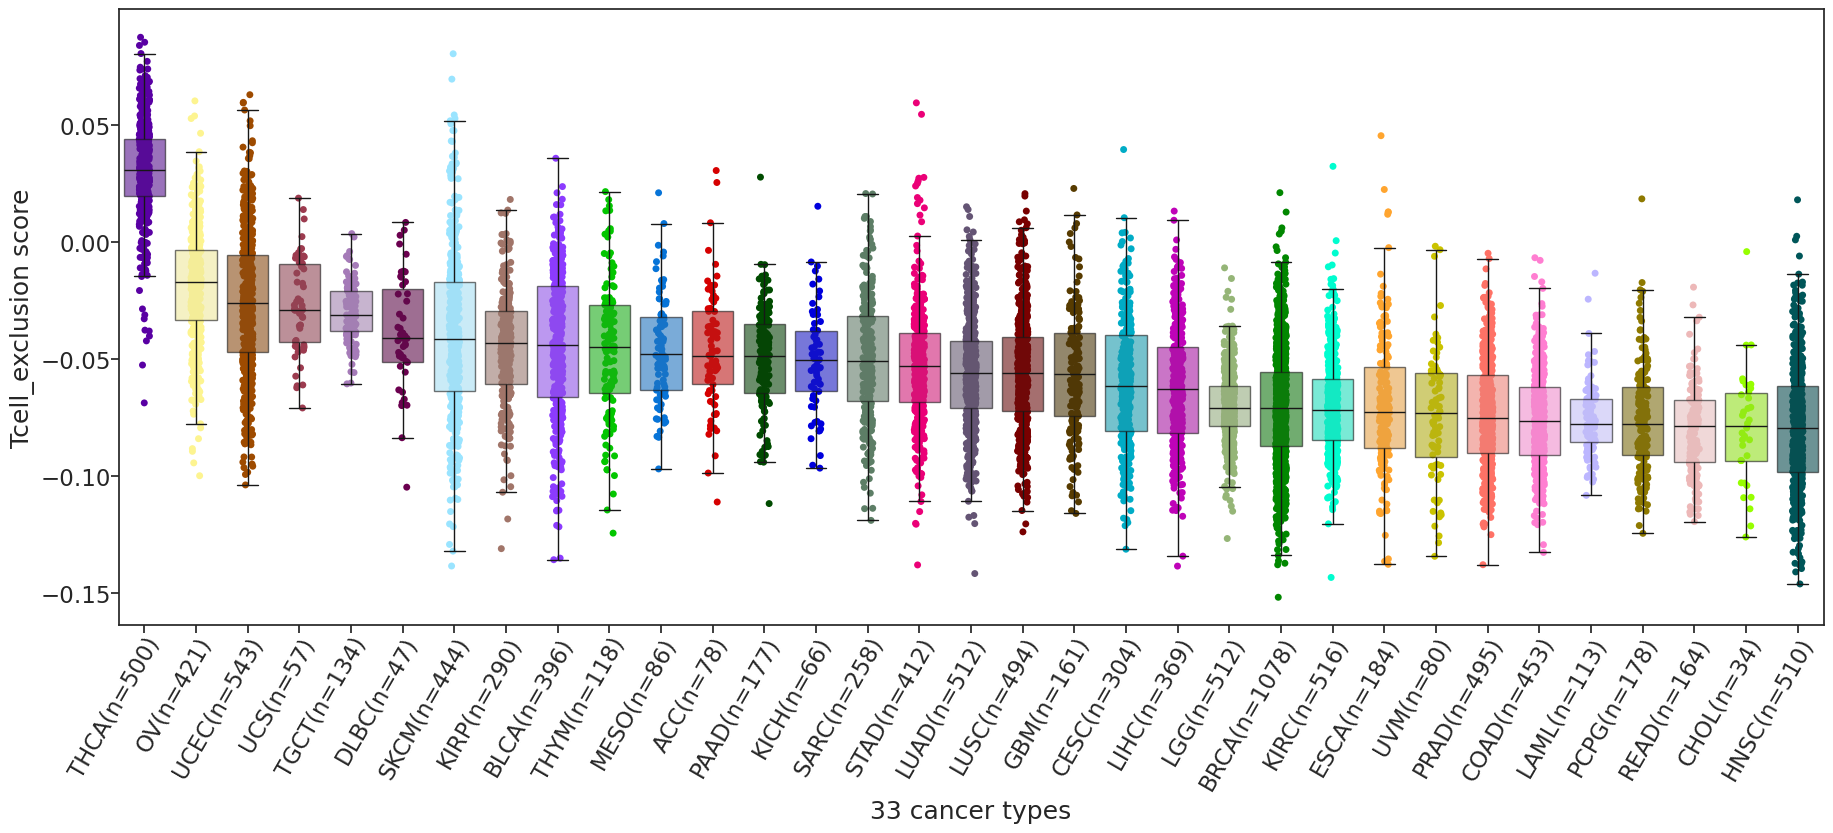

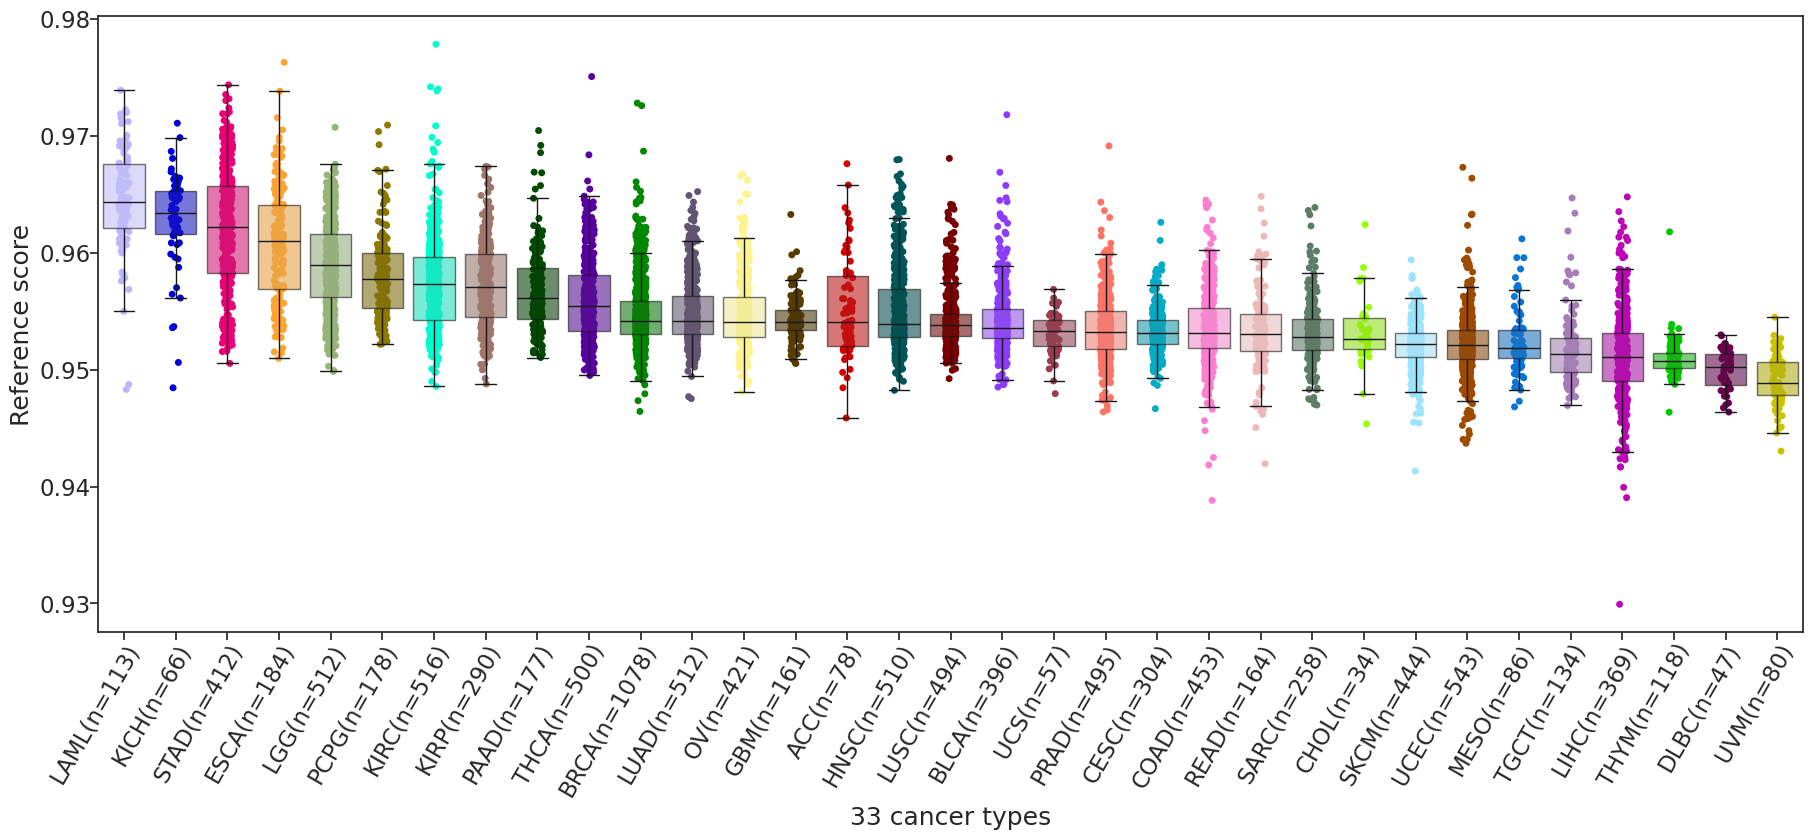

In [81]:
concepts = ['Mast', 'Na‹ve_Tcell', 'Cytotoxic_Tcell', 'Macrophage', 'Tcell_exclusion', 'Reference']
x = 'cancer_type'


import colorcet as cc

for y in concepts:    
    data = tcga[[x, y]]
    data['cancer_type'] = data['cancer_type'].map(size)
    
    data = data.sort_values([x, y ])
    cancer_order = data.groupby(x)[y].median().sort_values(ascending=False).index
    cancer_color = pd.Series(cancer_color_map).loc[cancer_order].tolist()
    
    fig, ax = plt.subplots(figsize=(22, 8))
    sns.boxplot(data, x = x, y = y, fliersize = 0, order = cancer_order,  palette= cancer_color, boxprops={'alpha':0.6})
    sns.stripplot(data, x = x, y = y, order = cancer_order,  palette = cancer_color, size = 5, edgecolor='k', zorder=0) #, hue = 'cancer_type'
    
    ax.set_ylabel('%s score' % y)
    ax.set_xlabel('33 cancer types')
    ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
    ax.set_xticklabels(cancer_order, 
                        rotation=60, 
                        ha="right",  
                        rotation_mode="anchor")  # <====== HERE is the ke
    
    fig.savefig('Concept_TCGA_%s.pdf' % y, bbox_inches ='tight')

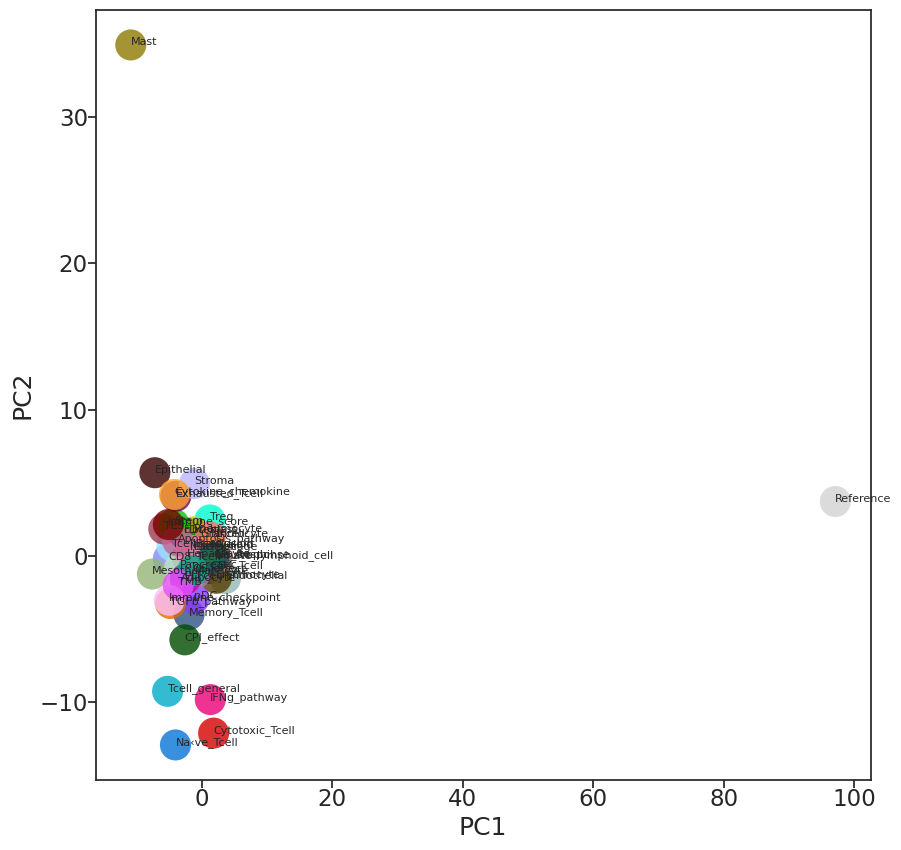

In [7]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
data = tcga[hue_order]
mp = PCA(n_components = 2)
c2d = mp.fit_transform(data.T)
df2d  = pd.DataFrame(c2d, index=data.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 500,
                hue_order = hue_order, palette=hue_color, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':8})

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

fig.savefig('Score_TCGA_Cell_concept_PCA.pdf' ,bbox_inches ='tight')

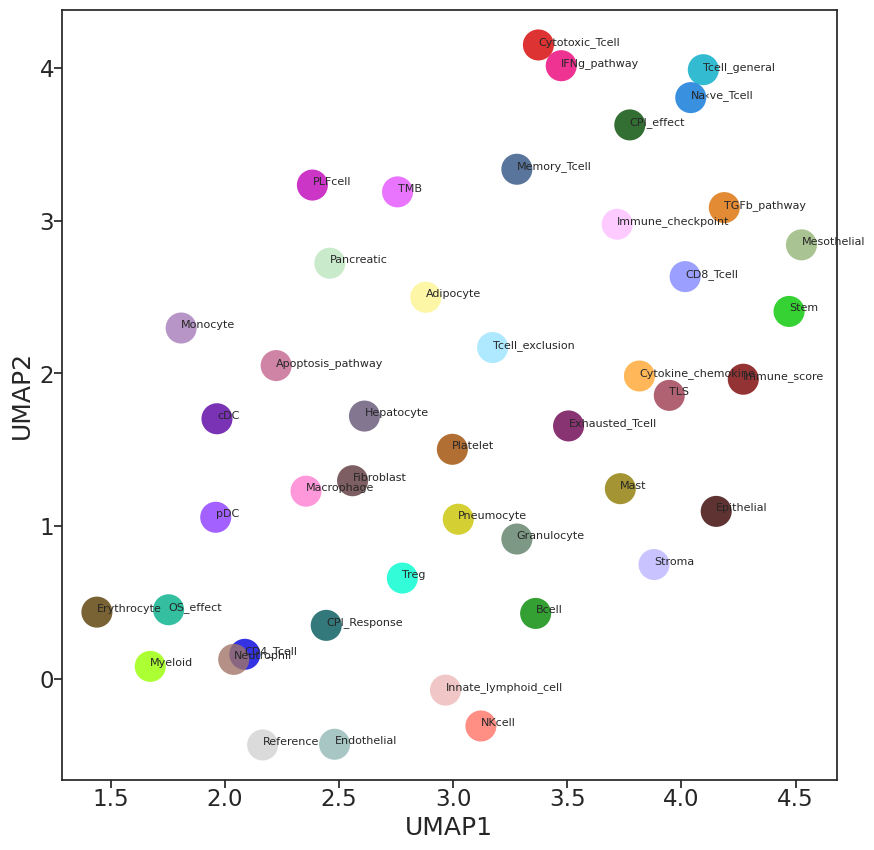

In [8]:
data = tcga[hue_order]
mp = UMAP(n_components = 2)
c2d = mp.fit_transform(data.T)
df2d  = pd.DataFrame(c2d, index=data.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 500,
                hue_order = hue_order, palette=hue_color, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':8})


ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

fig.savefig('Score_TCGA_Cell_concept_UMAP.pdf' ,bbox_inches ='tight')

Index(['SARC', 'BLCA', 'ESCA', 'DLBC', 'CESC', 'SKCM', 'MESO', 'BRCA', 'CHOL',
       'HNSC', 'TGCT', 'LAML', 'STAD', 'LUSC', 'KIRC', 'LUAD', 'UCEC', 'LIHC',
       'THYM', 'PAAD', 'UCS', 'KIRP', 'OV', 'COAD', 'ACC', 'GBM', 'READ',
       'THCA', 'PRAD', 'PCPG', 'KICH', 'LGG', 'UVM'],
      dtype='object', name='cancer_type')